# Hypothesis Testing - Real Estate Dataset (Real Data)
This notebook contains hypothesis tests on the real Istanbul real estate dataset.

In [29]:
# Import libraries
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load and clean the dataset
df = pd.read_csv("Real Estate in ISTANBUL (Emlakjet).csv")
df = df[["İl", "İlçe", "Mahalle", "Oda_Sayısı", "Brüt_Metrekare", "Binanın_Yaşı",
         "Bulunduğu_Kat", "Banyo_Sayısı", "Fiyatı"]].dropna()
df.columns = ["city", "district", "neighborhood", "number_of_rooms", "area_sqm",
              "building_age", "floor", "number_of_bathrooms", "price"]
df["room_numeric"] = df["number_of_rooms"].str.extract(r"(\d+)").astype(float)
df["number_of_bathrooms"] = pd.to_numeric(df["number_of_bathrooms"], errors="coerce")
df.dropna(inplace=True)

## Hypothesis 1: Correlation between Number of Rooms and Price
- H0: There is no correlation between the number of rooms and price.
- H1: There is a significant correlation between the number of rooms and price.

In [30]:
# Pearson correlation test
corr, p_value = stats.pearsonr(df['room_numeric'], df['price'])
print(f"Correlation Coefficient: {corr:.3f}")
print(f"p-value: {p_value:.5f}")

Correlation Coefficient: 0.073
p-value: 0.00009


## Hypothesis 2: Are newer buildings more expensive?
- H0: Average prices are the same across building age groups.
- H1: At least one group has a significantly different average price.

In [31]:
# Simplify building age into groups
df['age_group'] = df['building_age'].replace({
    '0-1': '0-5',
    '2': '0-5',
    '3-4': '0-5',
    '5-10': '5-10',
    '11-15': '11-20',
    '16-20': '11-20',
    '21 Ve Üzeri': '21+'
})

# ANOVA test
groups = [g['price'].values for n, g in df.groupby('age_group') if len(g) > 30]
f_stat, p_value = stats.f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.3f}")
print(f"p-value: {p_value:.5f}")

ANOVA F-statistic: 0.273
p-value: 0.97493


## Hypothesis 3: Does floor level affect price?
- H0: Average prices are the same across floor levels.
- H1: At least one floor group has a significantly different average price.

In [32]:
# Filter for numeric floor values
df_floor = df[df['floor'].str.contains('Kat')].copy()
df_floor['floor_numeric'] = df_floor['floor'].str.extract(r'(\d+)').astype(float)
df_floor = df_floor.dropna()

# ANOVA test
groups = [g['price'].values for n, g in df_floor.groupby('floor_numeric') if len(g) > 20]
f_stat, p_value = stats.f_oneway(*groups)
print(f"ANOVA F-statistic (floor): {f_stat:.3f}")
print(f"p-value: {p_value:.5f}")

ANOVA F-statistic (floor): 0.627
p-value: 0.85465


### Visualization: Room Count vs. Price

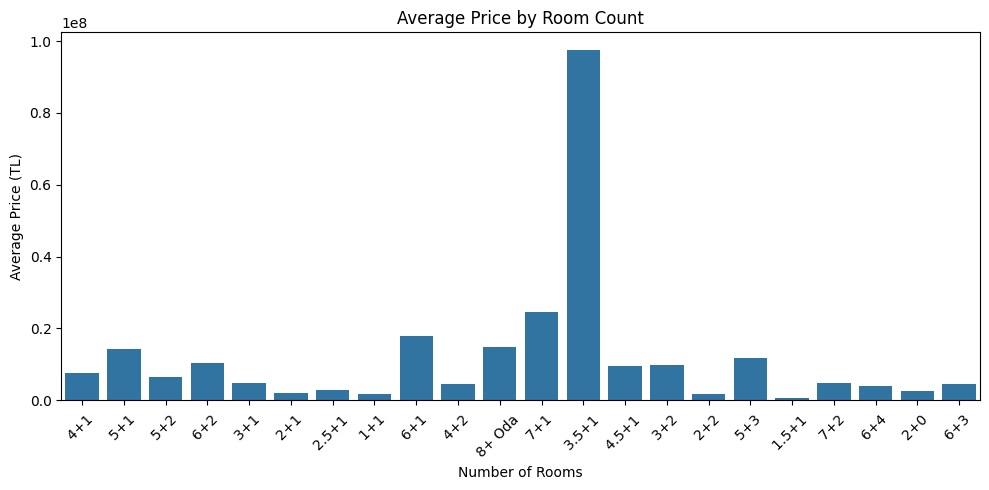

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="number_of_rooms", y="price", estimator=np.mean, errorbar=None)
plt.title("Average Price by Room Count")
plt.xlabel("Number of Rooms")
plt.ylabel("Average Price (TL)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Visualization: Building Age Group vs. Price

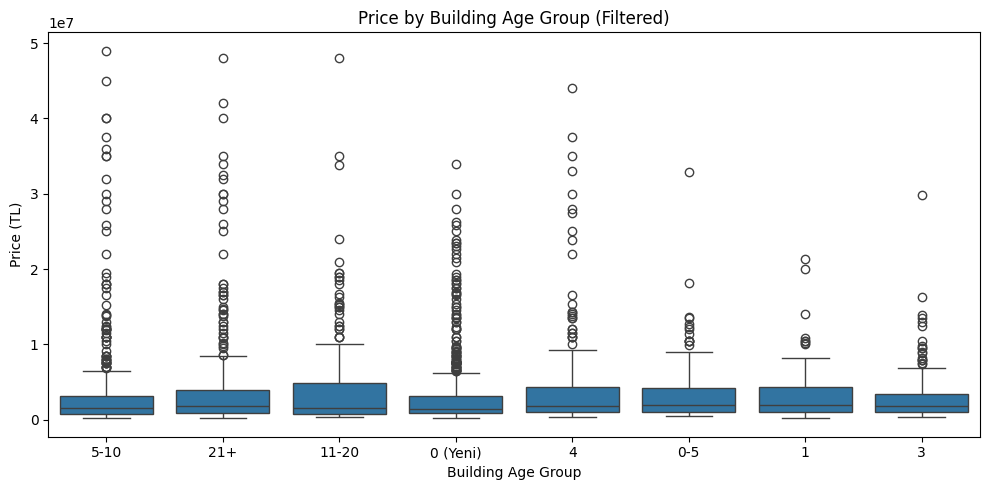

In [34]:
# Temizlik: yazım farklarını düzelt
df["building_age"] = df["building_age"].str.replace("–", "-").str.replace(" - ", "-").str.strip()

# Yaş gruplarını dönüştür
df["building_age_grouped"] = df["building_age"].replace({
    "0-1": "0-5",
    "2": "0-5",
    "3-4": "0-5",
    "5-10": "5-10",
    "11-15": "11-20",
    "16-20": "11-20",
    "21 Ve Üzeri": "21+",
    "21 ve üzeri": "21+"
})

# Boxplot: Fiyat vs. Bina Yaşı (filtrelenmiş)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[df["price"] < 5e7], x="building_age_grouped", y="price")
plt.title("Price by Building Age Group (Filtered)")
plt.xlabel("Building Age Group")
plt.ylabel("Price (TL)")
plt.tight_layout()
plt.show()

### Visualization: Floor Level vs. Price

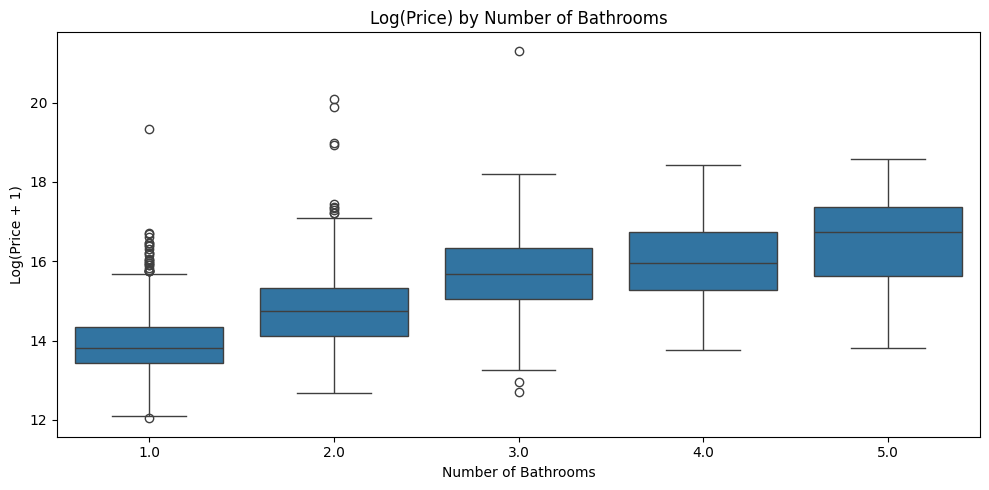

In [35]:
import numpy as np

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[df["number_of_bathrooms"] <= 6], 
            x="number_of_bathrooms", 
            y=np.log1p(df[df["number_of_bathrooms"] <= 6]["price"]))
plt.title("Log(Price) by Number of Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Log(Price + 1)")
plt.tight_layout()
plt.show()